### Text Processing: Handling Amharic text, tokenization, and preprocessing techniques.

To preprocess the scraped Amharic text data for tasks like tokenization, normalization, and handling Amharic-specific linguistic features, we need to follow several preprocessing steps tailored for the language. 

Here’s how we can approach this task:

**Steps to Preprocess Amharic Text**

- **Tokenization**: Tokenization is the process of splitting text into individual units such as words or subwords. Since Amharic uses a different script and has some unique linguistic features, tokenizing might need adjustments. 
    - Use specialized libraries that handle Amharic text or a custom rule-based tokenizer.

- **Normalization**: This step involves cleaning and converting the text into a standard format:

    - Remove special characters, punctuation, and numbers.
    - Normalize similar-looking characters.
    - Convert text to a standard form (for example, removing diacritics if necessary).

- **Handling Amharic-Specific Features:**

    - Amharic, like other Semitic languages, has specific features such as root-and-pattern morphology.

    - Handling unique orthographic variants and considering suffixes, prefixes, and infixes in the language.

    - Identifying verb conjugations, plural forms, and possessives for better tokenization.

In [31]:
# Import necessary libraries
import pandas as pd
import logging
import os, sys
import matplotlib.pyplot as plt
from matplotlib import font_manager
from collections import Counter
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import data preprocessor class
from amharic_text_processor import AmharicTextPreprocessor

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2024-09-25 17:17:34,903 - INFO - Imported libraries and configured logging.


**Load the scraped Telegram data**

In [2]:
# Read the data
data = pd.read_csv('../data/telegram_data.csv')
# Explore the first five rows
data.head()

,Channel Title,Channel Username,ID,Message,Date,Media Path
0,ልዩ እቃ,@Leyueqa,5819,🔠🔠🔠🔠🔠Siliver crest ➡️Brand ባለ1 እና ባለ 2 ተች ስቶ...,2024-09-25 17:39:49+00:00,NaN
1,ልዩ እቃ,@Leyueqa,5818,🔠🔠🔠🔠ሶስት ፍሬ የዳቦ እና የኬክ ቅርጽ ማውጫ ( መጋገሪያ ፓትራ )\n\...,2024-09-25 10:38:58+00:00,NaN
2,ልዩ እቃ,@Leyueqa,5817,🧳🧳🧳HIGH PRESSURE WATER GUN HEAD SET\n👉 360° የሚ...,2024-09-25 07:44:47+00:00,NaN
3,ልዩ እቃ,@Leyueqa,5816,NaN,2024-09-25 05:48:40+00:00,NaN
4,ልዩ እቃ,@Leyueqa,5815,NaN,2024-09-25 05:48:40+00:00,../data/photos/@Leyueqa_5815.jpg


In [3]:
# Check the last five rows
data.tail()

,Channel Title,Channel Username,ID,Message,Date,Media Path
1666,ልዩ እቃ,@Leyueqa,148,ይመቻቹ ፈታ ያለ ምሽት ተመኘሁ,2018-10-25 13:09:24+00:00,NaN
1667,ልዩ እቃ,@Leyueqa,136,NaN,2018-10-20 12:46:15+00:00,NaN
1668,ልዩ እቃ,@Leyueqa,70,NaN,2018-09-04 15:28:25+00:00,NaN
1669,ልዩ እቃ,@Leyueqa,55,NaN,2018-08-23 20:18:56+00:00,NaN
1670,ልዩ እቃ,@Leyueqa,1,NaN,2018-08-02 07:30:19+00:00,NaN


In [4]:
# Let's check the missing values
data.isnull().sum()

Channel Title         0
Channel Username      0
ID                    0
Message             704
Date                  0
Media Path          546
dtype: int64

In [6]:
# Preprocess and tokenizes the amharic message
if __name__ == "__main__":
    # Amharic text sample
    amharic_text = "ሰላም እንዴት ነህ? እንኳን ደህና መጣህ።"

    preprocessor = AmharicTextPreprocessor()

    # Preprocess the text
    tokens = preprocessor.preprocess_dataframe(data, 'Message')
    display(tokens)


,Channel Title,Channel Username,ID,Message,Date,Media Path,Message_preprocessed
0,ልዩ እቃ,@Leyueqa,5819,🔠🔠🔠🔠🔠Siliver crest ➡️Brand ባለ1 እና ባለ 2 ተች ስቶ...,2024-09-25 17:39:49+00:00,NaN,"[ባለ, እና, ባለ, ተች, ስቶቭ, ግዜዎን, እና, ጉልበትዎን, የሚቆጥብ,..."
1,ልዩ እቃ,@Leyueqa,5818,🔠🔠🔠🔠ሶስት ፍሬ የዳቦ እና የኬክ ቅርጽ ማውጫ ( መጋገሪያ ፓትራ )\n\...,2024-09-25 10:38:58+00:00,NaN,"[ሶስት, ፍሬ, የዳቦ, እና, የኬክ, ቅርጽ, ማውጫ, መጋገሪያ, ፓትራ, ..."
2,ልዩ እቃ,@Leyueqa,5817,🧳🧳🧳HIGH PRESSURE WATER GUN HEAD SET\n👉 360° የሚ...,2024-09-25 07:44:47+00:00,NaN,"[የሚዞር, በቀላሉ, የውሃ, ቱቦ, ላይ, የሚገጠም, ለመኪና, እጥበት, ተ..."
3,ልዩ እቃ,@Leyueqa,5816,NaN,2024-09-25 05:48:40+00:00,NaN,NaN
4,ልዩ እቃ,@Leyueqa,5815,NaN,2024-09-25 05:48:40+00:00,../data/photos/@Leyueqa_5815.jpg,NaN
...,...,...,...,...,...,...,...
1666,ልዩ እቃ,@Leyueqa,148,ይመቻቹ ፈታ ያለ ምሽት ተመኘሁ,2018-10-25 13:09:24+00:00,NaN,"[ይመቻቹ, ፈታ, ያለ, ምሽት, ተመኘሁ]"
1667,ልዩ እቃ,@Leyueqa,136,NaN,2018-10-20 12:46:15+00:00,NaN,NaN
1668,ልዩ እቃ,@Leyueqa,70,NaN,2018-09-04 15:28:25+00:00,NaN,NaN
1669,ልዩ እቃ,@Leyueqa,55,NaN,2018-08-23 20:18:56+00:00,NaN,NaN


Identify the most common amharic words in Telegram Ecomerce Messages

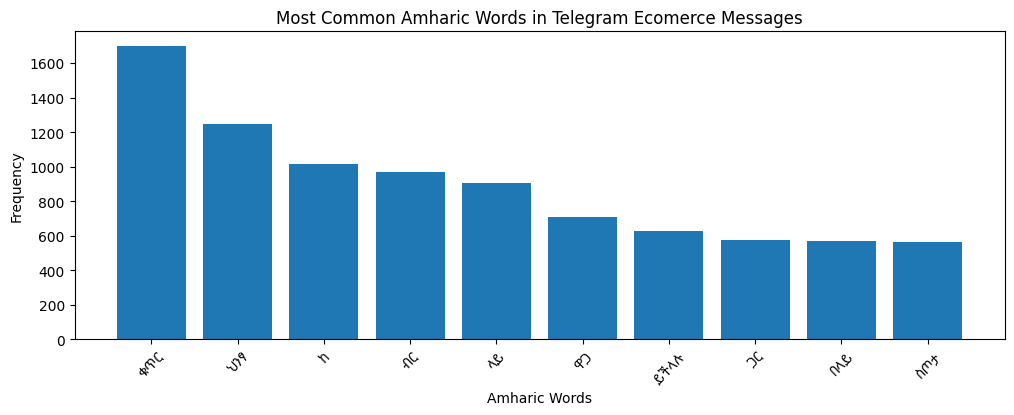

In [30]:
# Ensure there are no NaN values in the preprocessed column
preprocessed_texts = data['Message_preprocessed'].dropna().tolist()

# Filter out non-list entries and flatten the list of lists
all_words = [word for sublist in preprocessed_texts if isinstance(sublist, list) for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(10)

# Prepare data for plotting
words, counts = zip(*common_words)

# Specify the path to your font file
font_path = '../fonts/NotoSansEthiopic-Regular.ttf'  # Adjust the path accordingly

# Add the font properties
prop = font_manager.FontProperties(fname=font_path)

# Now create your plot as before, but use the font properties
plt.figure(figsize=(12, 4))
# Create a bar chart
plt.bar(words, counts)
plt.xlabel('Amharic Words')
plt.ylabel('Frequency')
plt.title('Most Common Amharic Words in Telegram Ecomerce Messages')
plt.xticks(rotation=45, fontsize=12, fontproperties=prop)
plt.show()


In [ ]:
sed_texts = data['Message_preprocessed'].dropna().tolist()


In [21]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the preprocessed messages
preprocessed_texts = data['Message_preprocessed'].tolist()

# Flatten the list of lists into a single list of words
all_words = [word for sublist in preprocessed_texts for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(10)

# Prepare data for plotting
words, counts = zip(*common_words)

# Create a bar chart
plt.bar(words, counts)
plt.xlabel('Amharic Words', fontproperties=prop)
plt.ylabel('Frequency')
plt.title('Most Common Amharic Words in Telegram Messages')
plt.xticks(rotation=45)
plt.show()


TypeError: 'float' object is not iterable